**hypothesis**
---
* games with multiple sequels (new mario, fifa, cod etc) will have lower critic ratings w/ higher critic counts
* non e games don't do that well on nintendo consoles
* most nintendo games are platformers
* (combination of top two) most e games are platformers
* critic scores and user scores will often be similar
* "shovelware"(in this case misc (although not all are)) are most predominant on Nintendo consoles
* sport games will be of similar quantity throughout all consoles
* NA holds more than 50% of global sales
* indie/less well known companies will have lower critic reviews, higher user score (still not that high)
* older games will have higher average sales (due to having less "non quality" games back then)

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [5]:
games = pd.read_csv("../analysis/gamedata.csv")
#games


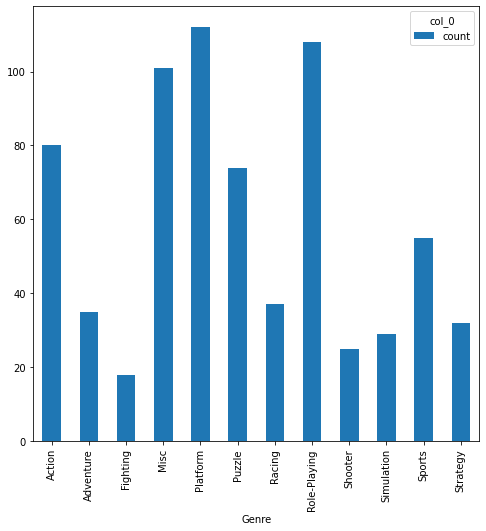

In [6]:
#most nintendo games are platformers
games[games["Publisher"] == "Nintendo"]["Genre"].value_counts()
nintendo_genre = pd.crosstab(index=games[games["Publisher"] == "Nintendo"]["Genre"],columns="count")
nintendo_genre.plot(kind="bar",figsize =(8,8));

In [7]:
#adding extra column
#apply function
pd.set_option('display.max_rows', 10)

def get_manufacturer(platform):
    x = 0
    b = {"PS":"Sony", "DS":"Nintendo", "Wii":"Nintendo", "X":"Microsoft", "PC":"Pc","GB":"Nintendo", "GC":"Nintendo", "N64":"Nintendo",  "NES":"Nintendo"}
    for item in list(b):
        if item in platform:
            return list(b.values())[x]
            break
        elif x < len(b):
            x +=1
        else:
            return "Other"
    
def team_size(producer):
    if pd.isna(producer):
        return "Unknown"
    if pub_count[pub_count["Name"] == str(producer)]["Count"].item() >= 150:
        return "AAA"
    else:
        return "Non AAA"
def is_series(name):
    for item in list(visited):
        if pd.isna(name):
            return False
        if item in name:
            return True
    split_name = name.split()
    for item in split_name:
        visited[str(item)] = True
    return False
def replace_tbd(x):
    if x == 'tbd':
        return np.NaN
    return x 
#get manufacturer    
games['Manufacturer'] = games['Platform'].apply(get_manufacturer)
games_output = games['Publisher'].value_counts().reset_index()
games_output.columns = ['Name', 'Count']
games_output.to_csv('Publisher_value_count.csv')
pub_count = pd.read_csv("../analysis/Publisher_value_count.csv")
#Team size
games['Team_Size'] = games["Publisher"].apply(team_size)
#User score string to float
games["User_Score"] = games["User_Score"].apply(replace_tbd)
games['User_Score'] = games['User_Score'].astype(float) * 10
#series
visited = {}

games['Series'] = games['Name'].apply(is_series)


games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Manufacturer,Team_Size,Series
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E,Nintendo,AAA,False
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,AAA,False
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E,Nintendo,AAA,True
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E,Nintendo,AAA,True
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,AAA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Sony,AAA,True
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft,AAA,True
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Sony,Non AAA,True
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,Nintendo,Non AAA,True


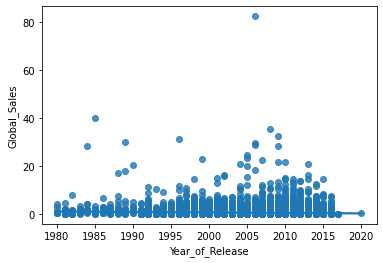

In [8]:
#older games will have higher average sales (due to having less "non quality" games back then)
ax = sns.regplot(x="Year_of_Release", y="Global_Sales", data=games)
#no difference, you can barely see the line betwen 2015 & 2020, with no growth

<AxesSubplot:ylabel='Manufacturer'>

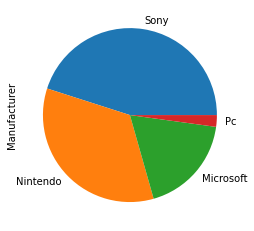

In [9]:

#sport games will be of similar quantity throughout all consoles
sports = games[games["Genre"] == "Sports"]["Manufacturer"]
sport_count = sports.value_counts()
sport_count.plot(kind='pie',fontsize=10)
#sony & nintendo have similar, while microsoft / pc is farther behind


0.5418795970814995


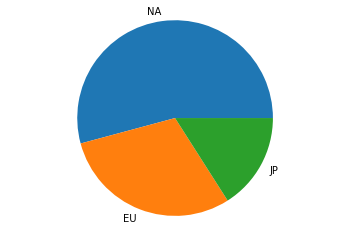

In [10]:
#NA holds more than 50% of global sales
games.columns
na_average = games['NA_Sales'].mean()
eu_average = games['EU_Sales'].mean()
jp_average = games["JP_Sales"].mean()
print(na_average/(na_average + eu_average + jp_average))


labels= ['NA', 'EU', 'JP']
sizes= [na_average*100, eu_average* 100, jp_average*100]
plt.pie(sizes,labels=labels)
plt.axis('equal')
plt.show()
#True, about 54% of sales are NA

In [11]:
#(combination of top two) most e games are platformers
games[games["Rating"] == "E"]["Genre"].value_counts()
#no, the most is sports, platform is #5

Sports          1188
Racing           585
Misc             457
Action           416
Platform         358
                ... 
Adventure        162
Role-Playing      84
Strategy          70
Shooter           48
Fighting           8
Name: Genre, Length: 12, dtype: int64

In [12]:
#non e games don't do that well on nintendo consoles
x = games[(games["Manufacturer"] == "Nintendo") & (games["Rating"] != "E")]
x_mean = x["Critic_Score"].mean()
print(x_mean)
y = games["Critic_Score"].mean()
print(y)

#False, the values are close enough to be considered similar (I was expecting ~ 10 - 15% difference)

66.05689655172414
68.96767850559173


/tmp/ipykernel_34083/855948867.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  games.groupby("Genre")["Critic_Score","User_Score"].mean().plot.bar()


<AxesSubplot:xlabel='Genre'>

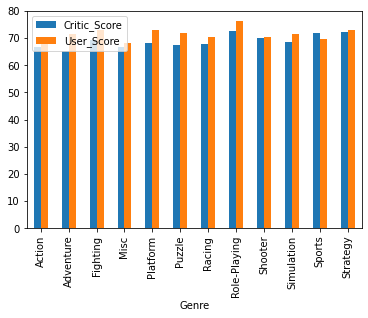

In [13]:
#Critc scores and user scores will often be similar
games.groupby("Genre")["Critic_Score","User_Score"].mean().plot.bar()
#True

<AxesSubplot:ylabel='Manufacturer'>

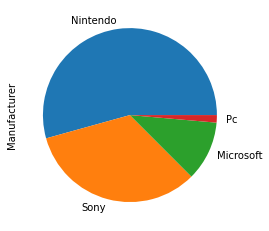

In [14]:
#"shovelware" are most predominant on Nintendo Consoles
games["Genre"].value_counts()

misc = games[games["Genre"] == "Misc"]["Manufacturer"]
misc_count = misc.value_counts()
misc_count.plot(kind='pie',fontsize=10)
#True

In [15]:
#games with multiple sequels (new mario, fifa, cod etc) will have lower critic ratings
x = games[games["Series"] == True]["Critic_Score"].mean()
y = games[games["Series"] == False]["Critic_Score"].mean()

print(x)
print(y)
#well yes, but actually no (good reviews = sequels, despite people getting bored of new soup for the 100th time)

68.9468405215647
70.0


In [16]:
#indie/less well known companies will have lower critic reviews, higher user score 
x = games[games["Team_Size"] == "Non AAA"]["Critic_Score"].mean()
y = games[games["Team_Size"] == "Non AAA"]["User_Score"].mean()

print(x)
print(y)

#True

63.966239813736905
69.60466666666666
